In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# from google.colab import files
# def getLocalFiles():
#     _files = files.upload()
#     if len(_files) >0:
#        for k,v in _files.items():
#          open(k,'wb').write(v)
# getLocalFiles()

In [ ]:
#!pip install nltk
#nltk.download('all')
#!pip install catboost
!pip install xgboost

In [2]:
#sys.path.append('C:/Applications/Machine Learning/NLP/CapstoneProjectNLP/lib')
import sys
sys.path.append('../')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
import data_augmentation
import preprocess_data 
import train_ml_model
import train_DL_model
import encode_data
import vectorizer
import feature_extraction
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from keras.initializers import Constant
from keras.layers import Embedding,LSTM,Dense,Dropout,Bidirectional
import keras.optimizers
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [4]:
accident_safety_data=pd.read_csv("C:/Applications/Machine Learning/NLP/CapstoneProjectNLP/data/hse_data.csv")
#accident_safety_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/CapstoneProjectNLP/data/hse_data.csv")

In [5]:
accident_safety_data.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [6]:
accident_safety_data.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

We can see that the columns "Unnamed" is unwanted, as it will not help us in our analysis. 
Also, Data column should be renamed to "Date". Therefore, let's drop the column "Unnamed" and rename the column "Data" to "Date"

In [7]:
#create a backup of the dataset before we make any changes to it
accident_safety_data_new=accident_safety_data
accident_safety_data_new.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [8]:
#dropping "Unnamed" column
accident_safety_data_new.drop('Unnamed: 0',axis='columns', inplace=True)
#renaming "Data" column to "Date"
accident_safety_data_new.rename(columns = {'Data':'Date'}, inplace = True)

In [9]:
#Let us check the shape of our dataset
accident_safety_data_new.shape

(425, 10)

We can see that the dataset has 425 rows and 10 columns

In [10]:
accident_safety_data_new.head()

Date   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [11]:
#Let us check for missing values in the dataset
accident_safety_data_new.isna().apply(pd.value_counts)

Date  Countries  Local  Industry Sector  Accident Level  \
False   425        425    425              425             425   

       Potential Accident Level  Genre  Employee or Third Party  \
False                       425    425                      425   

       Critical Risk  Description  
False            425          425

We can see that this dataset has no null values.

In [12]:
#Let us now check the datatype of the dataset and also get to know some more details
accident_safety_data_new.dtypes

Date                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

Here, we can see that all the columns of the dataset are of "object" datatype. Coming to the type of data present in each column, we can see that there is a column "Date", which means it holds time series data. All other columns except "Description" are of categorical datatype. 

In [13]:
accident_safety_data_new.describe().T

count unique  \
Date                       425    287   
Countries                  425      3   
Local                      425     12   
Industry Sector            425      3   
Accident Level             425      5   
Potential Accident Level   425      6   
Genre                      425      2   
Employee or Third Party    425      3   
Critical Risk              425     33   
Description                425    411   

                                                                        top  \
Date                                                    2017-02-08 00:00:00   
Countries                                                        Country_01   
Local                                                              Local_03   
Industry Sector                                                      Mining   
Accident Level                                                            I   
Potential Accident Level                                                 IV   
Genre                                                                  Male   
Employee or Third Party                                         Third Party   
Critical Risk                                                        Others   
Description               On 02/03/17 during the soil sampling in the re...   

                         freq  
Date                        6  
Countries                 251  
Local                      90  
Industry Sector           241  
Accident Level            316  
Potential Accident Level  143  
Genre                     403  
Employee or Third Party   189  
Critical Risk             232  
Description                 3

From the above table, we can infer the below:

1. This dataset contains accident data of 3 countries, out of which Country1 has the most number of accidents. 

2. The data is collected from 3 types of industry sectors.Local_3 has the most number of accidents.

3. There are 5 major accident levels in which this dataset has been classified.316 accidents are of accident level 1, making it the most frequent accident type. This also means that the data is not distributed evenly.

4. The data is a consolidation of accidents faced by employees as well as third party vendors and others. Third party employees have faced the most number of accidents according to this dataset.

5. 403 male employees have been reported to have accidents, which mean the distribution of data in this case is also not evenly balanced.

6. 33 different types of critical risks have been identified in the dataset.

We have seen that there are quite a few categorical columns in the dataset which can be encoded to numerical values e.g. 

1. Local

2. Accident Level

3. Potential Accident Level


In [14]:
accident_safety_data_new.head()

Date   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

UNIVARIATE ANALYSIS

Let us check the distribution of data based on accident levels

In [15]:
fig = px.histogram(accident_safety_data_new, x="Accident Level")
fig.show()

We can see that the distribution of Accident Levels is highly imbalanced in the dataset

1. Let us check the distribution of data based on country.

In [16]:
fig = px.histogram(accident_safety_data_new, x="Countries")
fig.show()

We can see that "Country_01" has the most number of accident cases.

Let us now see the distribution of accidents with respect to the type of employee.(Employee/ThirdParty/ThirdPartyRemote)

In [17]:
fig = px.histogram(accident_safety_data_new, x="Employee or Third Party")
fig.show()

From the graph it is very clear that accidents have happened in almost equal proportions among permanent employees or third party contractors, with thrid party contractors a bit on the higher side.

Let us also check the distribution of accidents as per industry sector.

In [18]:
fig = px.histogram(accident_safety_data_new, x="Industry Sector")
fig.show()

We can see that majority of accidents have happened in the mining sector, followed by metal industry and other type of industries.

We will now see the distribution of accidents as per Gender

In [19]:
fig = px.histogram(accident_safety_data_new, x="Genre")
fig.show()

Clearly, the distribution of accidents is imbalanced when checked by "Genre". The count of accidents in males is way higher than that in females.

Lastly, let us check the distribution by Locals.

In [20]:
fig = px.histogram(accident_safety_data_new, x="Local")
fig.show()

In [21]:
fig = px.histogram(accident_safety_data_new, x="Accident Level")
fig.show()

We can see that most of the people have met with accident having level 1.

In [22]:
fig = px.histogram(accident_safety_data_new, x="Critical Risk")
fig.show()

We can see from the graph that the Critical risk category "Others" have the most number of accidents. This means we are not clear about the exact risk factor associated with accidents in this dataset.

BIVARIATE ANALYSIS

Let us write a function to see how does the accident level varies with the Industry Sector and Countries

In [23]:
def plothistograms(data,column_name_x,column_name_color,value):
    fig = px.histogram(data, x=column_name_x, color=column_name_color, 
                   barmode=value
                  )
    fig.show()

1. We will see the distribution of different accident levels occured per country

In [24]:
plothistograms(accident_safety_data_new,"Countries","Accident Level","relative")

Observations from the above graph:
1. Accident Level V accidents have occured only in Country I.
2. Maximum number of accidents in all countries are mainly of type Accident Level I.
3. Country_01 has had accidents of all Accident types, making it the most riskiest place as per the dataset.

In [25]:
plothistograms(accident_safety_data_new,"Industry Sector","Accident Level","group")

The most number of accidents have occured in the Mining Industry in Country 1 so far, followed by the metal industry, also in Country 1.

2. Next, let us see how many accidents have occured per Local

In [26]:
plothistograms(accident_safety_data_new,"Local","Industry Sector","stack")
plothistograms(accident_safety_data_new,"Countries","Industry Sector","stack")
plothistograms(accident_safety_data_new,"Local","Accident Level","stack")

1. Local 01,Local 02,Local 03,Local 04,Local 07 all have plants belonging  to the Mining Sector and they have had the most number of accidents. 
2. Other industry sectors have had the least number of accidents.
3. Local 09 and Local_11 seems to be the safest cities, with only 2 accidents, even though it has plants belonging to the Metal sector.

In [27]:
#plothistograms(accident_safety_data_new,"Accident Level","Critical Risk","stack")
import plotly.graph_objects as go

labels = accident_safety_data_new['Critical Risk']
values = accident_safety_data_new['Critical Risk'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

1. Local 04 and Local_03 have the highest number of unknown risks i.e. of type "Other".
2. We can see that Local 06 has various kind of risks present, which means it could have more of metal plants there.
3. We can also see that the next critical risks apart from Other are "Power Lock","Fall/Fall Prevention" and "Vehicle and mobile equipment".

Here it is clearly visible that in the mining industry, third party employees have met with the maximum number of accidents as compared to the metal industry where their employees have met with the highest number of accidents.

In [28]:
plothistograms(accident_safety_data_new,"Potential Accident Level","Industry Sector","stack")

1. Major number of accidents have occured in the Potential Accident Level 3 category.
2. Potential Accident Level 5 is least in the mining industry.

NLP analysis


Let us see the most frequent words used for each accident level now.

1. Accident Level I

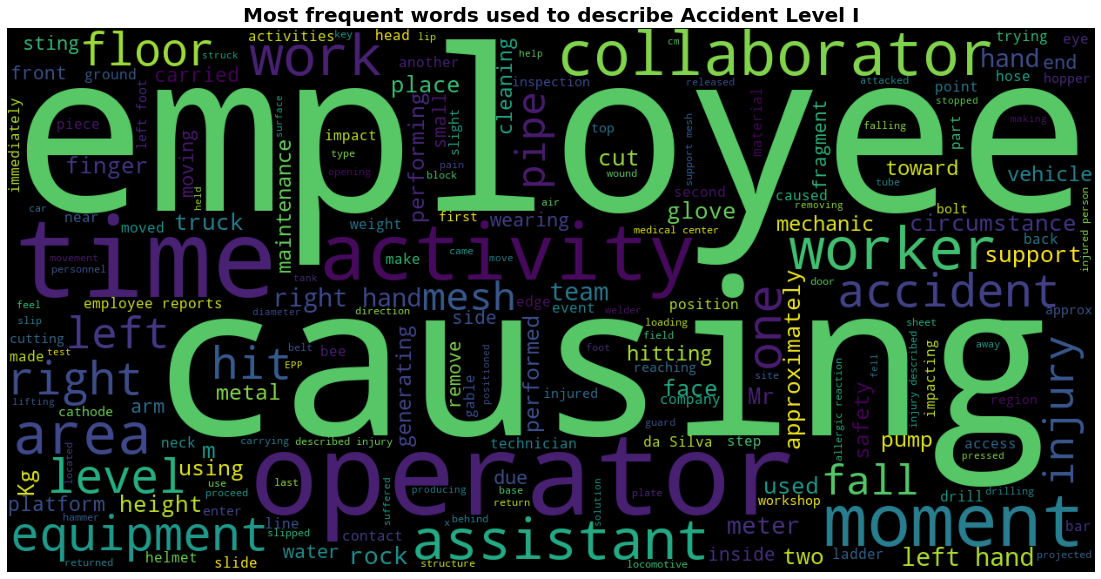

In [29]:
from wordcloud import WordCloud
keywords = " ".join(line for line in accident_safety_data_new[accident_safety_data_new['Accident Level']=='I'].Description)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords)
plt.figure(figsize=(20, 10))
plt.title("Most frequent words used to describe Accident Level I", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

2. Accident Level II

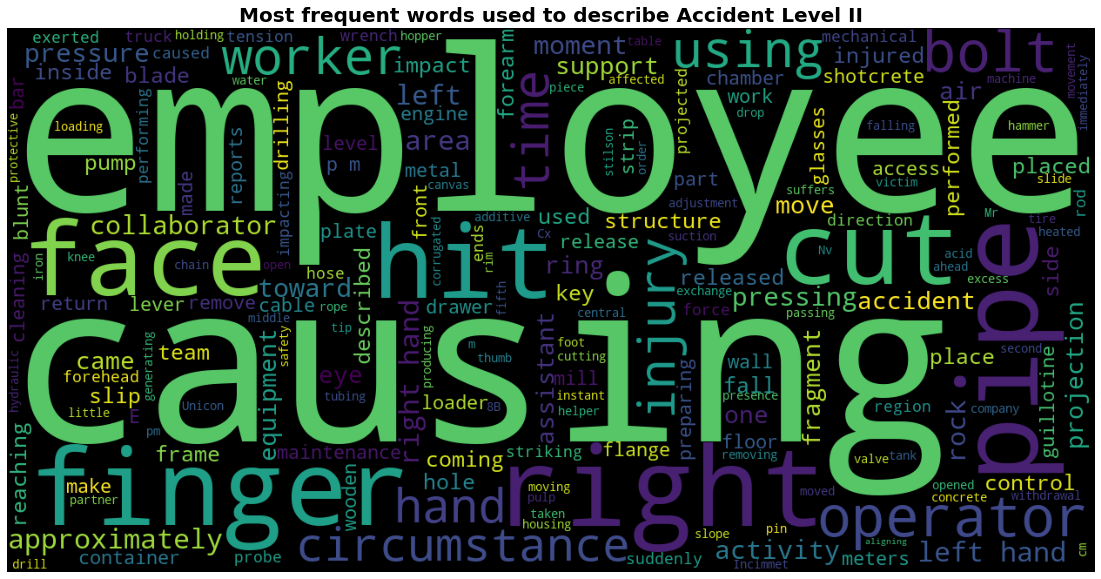

In [30]:
from wordcloud import WordCloud
keywords = " ".join(line for line in accident_safety_data_new[accident_safety_data_new['Accident Level']=='II'].Description)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords)
plt.figure(figsize=(20, 10))
plt.title("Most frequent words used to describe Accident Level II", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

3. Accident Level III

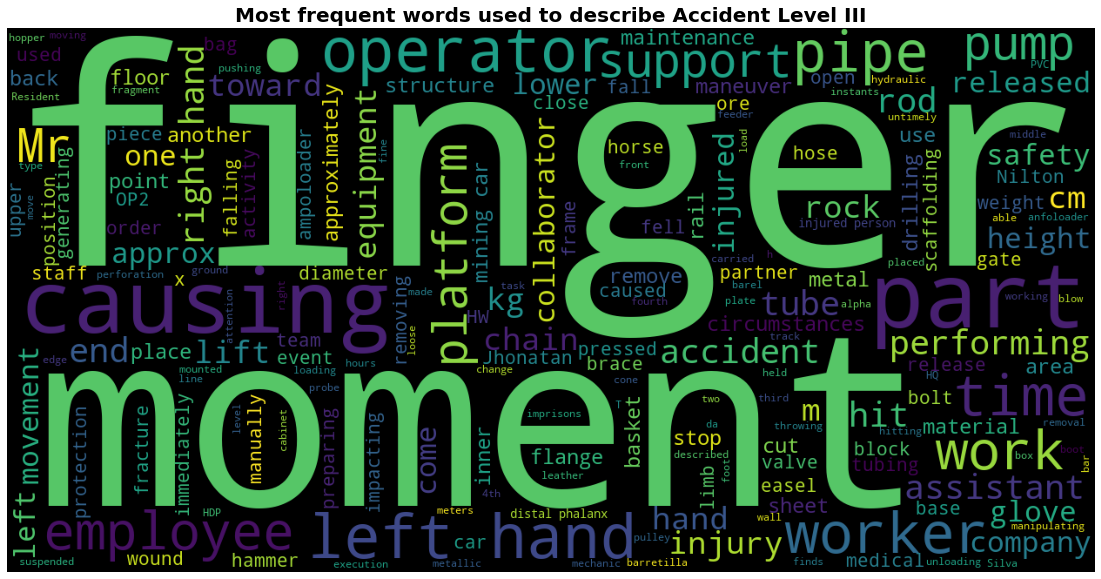

In [31]:
from wordcloud import WordCloud
keywords = " ".join(line for line in accident_safety_data_new[accident_safety_data_new['Accident Level']=='III'].Description)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords)
plt.figure(figsize=(20, 10))
plt.title("Most frequent words used to describe Accident Level III", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

4. Accident Level IV

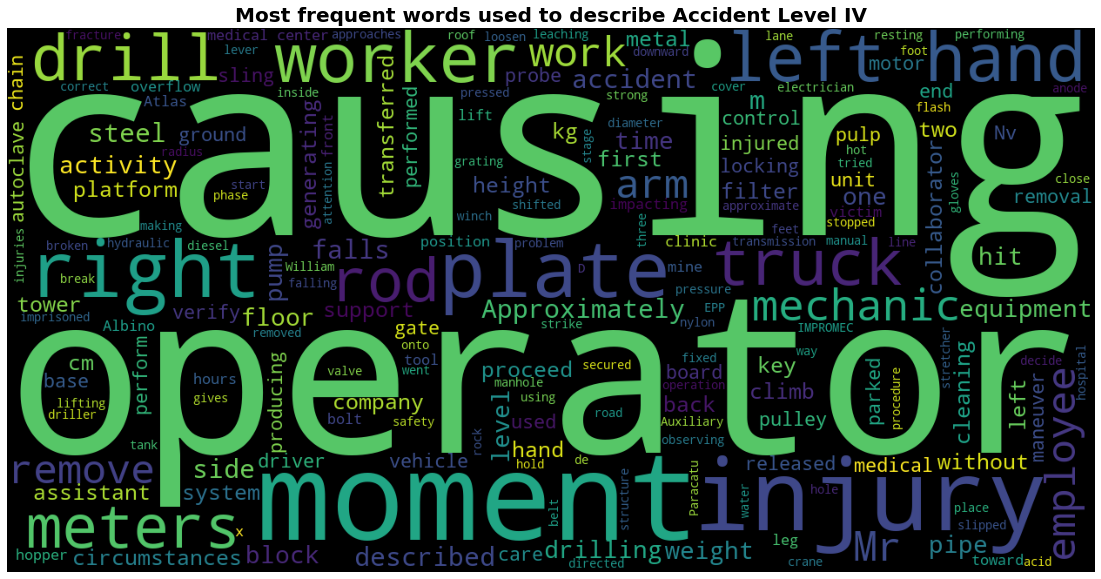

In [32]:
from wordcloud import WordCloud
keywords = " ".join(line for line in accident_safety_data_new[accident_safety_data_new['Accident Level']=='IV'].Description)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords)
plt.figure(figsize=(20, 10))
plt.title("Most frequent words used to describe Accident Level IV", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Accident Level V

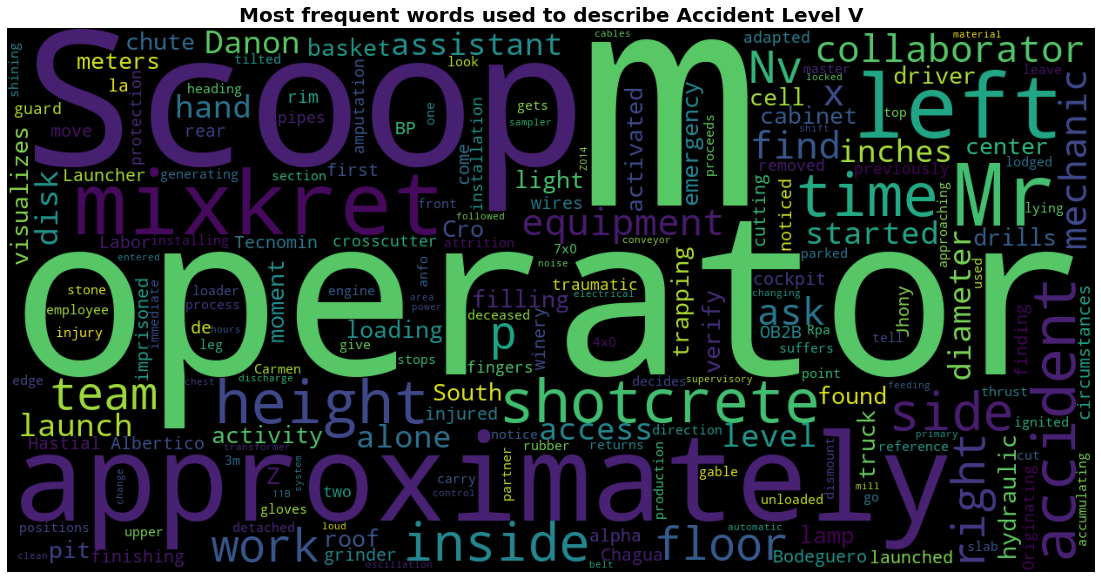

In [33]:
from wordcloud import WordCloud
keywords = " ".join(line for line in accident_safety_data_new[accident_safety_data_new['Accident Level']=='V'].Description)
word_cloud= WordCloud(width=1250, height=625, max_font_size=350, 
                      random_state=42).generate(keywords)
plt.figure(figsize=(20, 10))
plt.title("Most frequent words used to describe Accident Level V", size=20, weight="bold")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

DATA AUGMENTATION

In [34]:
#Let us first create a dataset using only the class variable "Accident Level" and Description column.
accident_safety_acc_level=accident_safety_data_new
accident_safety_acc_level['Accident_Level']=accident_safety_acc_level.apply(lambda col: str(col['Accident Level']), axis=1)
accident_safety_acc_level['Description_DL']=accident_safety_acc_level.apply(lambda col: str(col['Description']), axis=1)
accident_safety_acc_level=accident_safety_acc_level[['Accident_Level','Description_DL']]
accident_safety_acc_level.head()

Accident_Level                                     Description_DL
0              I  While removing the drill rod of the Jumbo 08 f...
1              I  During the activation of a sodium sulphide pum...
2              I  In the sub-station MILPO located at level +170...
3              I  Being 9:45 am. approximately in the Nv. 1880 C...
4             IV  Approximately at 11:45 a.m. in circumstances t...

In [35]:
labels, frequencies = np.unique(accident_safety_acc_level.Accident_Level.values, return_counts=True)

fig = px.pie(accident_safety_acc_level, values=frequencies, names=labels, title='Frequency of Description by Accident Level')
fig.show()


We can clearly see that the Description column is imbalanced in the dataset. Most of the description is present only for Accident Level I(0).

We will now check the exact counts of Descriptions per Accident level.

In [36]:
accident_safety_acc_level.Accident_Level.value_counts().values
for u in accident_safety_acc_level.Accident_Level.unique().tolist():
    print(u)

I
IV
III
II
V


Let us first divide our data into train and test samples

We will try different data augmentation techniques so that the data is balanced properly before it is passed into the dataset.

1. SImple upsampling


In [37]:
accident_safety_acc_level.Accident_Level.value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident_Level, dtype: int64

Using EDA let us perform data augmentation

In [38]:
options=['II']
df_1=accident_safety_acc_level.copy(True)
df_1=df_1.loc[df_1['Accident_Level'].isin(options)]
df_1.head()

Accident_Level                                     Description_DL
22             II  While aligning the right bracket of tower N ° ...
23             II  By loosening the A30-29 truck's steering cylin...
29             II  When using the griff wrench to unscrew the rod...
40             II  During maintenance of the Flyght pump rotor, t...
55             II  During the discharge of waste, the operator pr...

In [39]:
options=['III']
df_2=accident_safety_acc_level.copy(True)
df_2=df_2.loc[df_2['Accident_Level'].isin(options)]
df_2.head()

Accident_Level                                     Description_DL
16            III  At Rp 050 of level 1620, in circumstances wher...
32            III  The worker Yaranga while working with barretil...
49            III  At a time when a worker and another partner we...
51            III  In circumstances that two workers of the compa...
54            III  By manually moving a steel cabinet for disposa...

In [40]:
options=['IV']
df_3=accident_safety_acc_level.copy(True)
df_3=df_3.loc[df_3['Accident_Level'].isin(options)]
df_3.head()

Accident_Level                                     Description_DL
4              IV  Approximately at 11:45 a.m. in circumstances t...
13             IV  In moments that the operator of the Jumbo 2, t...
61             IV  Approximately at 11:50 a.m. in circumstances t...
67             IV  During the refurbishment work of the HDPE pipe...
79             IV  When performing the sleeve removal maneuver, w...

In [41]:
options=['V']
df_4=accident_safety_acc_level.copy(True)
df_4=df_4.loc[df_4['Accident_Level'].isin(options)]
df_4.head()

Accident_Level                                     Description_DL
33               V  Approximately 1:40 p.m. in circumstances that ...
135              V  Being 01:50 p.m. approximately, in the Nv. 180...
162              V  In access 2 of level 3910, during the installa...
307              V  During the process of loading drills in the Ca...
351              V  When the scoop was heading from Rpa 910 to the...

In [42]:
from lib.data_augmentation import gen_eda
df_1_up=gen_eda(df_1,0.5,0.2,0.2,0.1,10)
df_2_up=gen_eda(df_2,0.5,0.2,0.2,0.1,10)
df_3_up=gen_eda(df_3,0.5,0.2,0.2,0.1,10)
df_4_up=gen_eda(df_4,0.5,0.2,0.2,0.1,30)

In [43]:
accident_safety_acc_level_eda_upsampled = pd.concat([df_1_up,df_2_up,df_3_up,df_4_up])

In [44]:
accident_safety_acc_level_eda_upsampled.describe().T

count unique  \
Accident_Level  1359      4   
Description_DL  1359   1358   

                                                              top freq  
Accident_Level                                                 II  440  
Description_DL  The employees Márcio and Sérgio performed the ...    2

In [45]:
accident_safety_acc_level_eda_upsampled = accident_safety_acc_level_eda_upsampled.append(accident_safety_acc_level[accident_safety_acc_level.Accident_Level == 'I'])

In [46]:
print(accident_safety_acc_level.Description_DL[0])
print(accident_safety_acc_level_eda_upsampled.Description_DL[1])

While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
1    patch coordinate the compensate wall bracket o...
1    at Rp 050 of spirit level 1620, in portion whe...
1    approximately at 11:45 ante meridiem in fortun...
1    more or less 1:40 post meridiem in considerati...
1    During the activation of a sodium sulphide pum...
Name: Description_DL, dtype: object


In [47]:
accident_safety_acc_level_eda_upsampled.head(10)

Accident_Level                                     Description_DL
0             II  patch array the decent bracket out of loom new...
1             II  patch coordinate the compensate wall bracket o...
2             II  while ordinate the right wing angle bracket of...
3             II  While remold tautness aligning the right brack...
4             II  While aligning the facade right bracket of tow...
5             II  While aligning away the right bracket of tower...
6             II  While N the right bracket of tower aligning ° ...
7             II  While applied tower right bracket of the N ° t...
8             II  While operator the of bracket of tower N ° 32,...
9             II  While aligning the right bracket of tower N ° ...

In [48]:
labels, frequencies = np.unique(accident_safety_acc_level_eda_upsampled.Accident_Level.values, return_counts=True)

fig = px.pie(accident_safety_acc_level_eda_upsampled, values=frequencies, names=labels, title='Frequency of Description by Accident Level')
fig.show()

In [49]:
from lib.preprocess_data import clean_DL_data1
accident_safety_acc_level_eda_upsampled["Description_DL_clean"] = accident_safety_acc_level_eda_upsampled["Description_DL"].apply(lambda x: clean_DL_data1(x))

In [50]:
from lib.preprocess_data import clean_DL_data
corpus_DL=clean_DL_data(accident_safety_acc_level_eda_upsampled)
len(corpus_DL)

1675

In [51]:
from lib.preprocess_data import clean_data
accident_safety_acc_level_eda_upsampled["Description_ML"] = accident_safety_acc_level_eda_upsampled["Description_DL"].apply(lambda x: clean_data(x))

In [52]:
from lib.preprocess_data import prepare_ml_data1
corpus_ML=prepare_ml_data1(accident_safety_acc_level_eda_upsampled,True,True)
len(corpus_ML)

1675

In [53]:
accident_safety_acc_level_eda_upsampled.head(10)

Accident_Level                                     Description_DL  \
0             II  patch array the decent bracket out of loom new...   
1             II  patch coordinate the compensate wall bracket o...   
2             II  while ordinate the right wing angle bracket of...   
3             II  While remold tautness aligning the right brack...   
4             II  While aligning the facade right bracket of tow...   
5             II  While aligning away the right bracket of tower...   
6             II  While N the right bracket of tower aligning ° ...   
7             II  While applied tower right bracket of the N ° t...   
8             II  While operator the of bracket of tower N ° 32,...   
9             II  While aligning the right bracket of tower N ° ...   

                                Description_DL_clean  \
0  patch array the decent bracket out of loom new...   
1  patch coordinate the compensate wall bracket o...   
2  while ordinate the right wing angle bracket of...   
3  While remold tautness aligning the right brack...   
4  While aligning the facade right bracket of tow...   
5  While aligning away the right bracket of tower...   
6  While N the right bracket of tower aligning  #...   
7  While applied tower right bracket of the N  to...   
8  While operator the of bracket of tower N  ## w...   
9  While aligning the right bracket of tower N  #...   

                                      Description_ML  
0  patch array decent bracket loom newton bring s...  
1  patch coordin compens wall bracket pillar newt...  
2  ordin right wing angl bracket pillar north pub...  
3  remold taut align right bracket away tower rel...  
4  align facad right bracket tower releas whelm t...  
5  align away right bracket tower mechan skill el...  
6  right bracket tower align mechan releas beat t...  
7  appli tower right bracket toward releas releas...  
8  oper bracket tower releas tension releas tirfo...  
9  align right bracket tower releas tension appli...

In [54]:
print(accident_safety_acc_level_eda_upsampled.Description_DL[1])
print(accident_safety_acc_level_eda_upsampled.Description_DL_clean[1])
print(accident_safety_acc_level_eda_upsampled.Description_ML[1])

1    patch coordinate the compensate wall bracket o...
1    at Rp 050 of spirit level 1620, in portion whe...
1    approximately at 11:45 ante meridiem in fortun...
1    more or less 1:40 post meridiem in considerati...
1    During the activation of a sodium sulphide pum...
Name: Description_DL, dtype: object
1    patch coordinate the compensate wall bracket o...
1    at Rp ### of spirit level #### in portion wher...
1    approximately at #### ante meridiem in fortune...
1    more or less ### post meridiem in consideratio...
1    During the activation of a sodium sulphide pum...
Name: Description_DL_clean, dtype: object
1    patch coordin compens wall bracket pillar newt...
1    spirit level portion worker companionship play...
1    approxim ant meridiem fortun mechan mark antho...
1    less post meridiem consider shotcret plung end...
1    activ sodium sulphid pump pipe uncoupl sulfid ...
Name: Description_ML, dtype: object


Feature extraction. We will try the below vectorizers

1. Count Vectorizer
2. TF IDF vectorizer
3. WordVec
4. GlOve

We will first work with deep learning data and then machine learning data

In [55]:
#Let us first divide the data into train and test with 80 and 20%. We will use the parameter stratify to get a similar distribution across all accident levels.
X_orig=accident_safety_acc_level_eda_upsampled['Description_DL']
Y_orig=accident_safety_acc_level_eda_upsampled['Accident_Level']
from sklearn.model_selection import train_test_split
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, Y_orig, test_size=0.20, random_state=42, stratify=accident_safety_acc_level_eda_upsampled['Accident_Level'])

In [56]:
#Let us first divide the data into train and test with 80 and 20%. We will use the parameter stratify to get a similar distribution across all accident levels.
X_DL_clean=accident_safety_acc_level_eda_upsampled['Description_DL_clean']
Y_DL_clean=accident_safety_acc_level_eda_upsampled['Accident_Level']
from sklearn.model_selection import train_test_split
X_train_DL_clean, X_test_DL_clean, y_train_DL_clean, y_test_DL_clean = train_test_split(X_DL_clean, Y_DL_clean, test_size=0.20, random_state=42, stratify=accident_safety_acc_level_eda_upsampled['Accident_Level'])

In [57]:
#Let us first divide the data into train and test with 80 and 20%. We will use the parameter stratify to get a similar distribution across all accident levels.
X_ML=accident_safety_acc_level_eda_upsampled['Description_ML']
Y_ML=accident_safety_acc_level_eda_upsampled['Accident_Level']
from sklearn.model_selection import train_test_split
X_train_ML, X_test_ML, y_train_ML, y_test_ML = train_test_split(X_ML, Y_ML, test_size=0.20, random_state=42, stratify=accident_safety_acc_level_eda_upsampled['Accident_Level'])

We will extract features with different values of N

1. Count Vectorizer

In [58]:
#N=1 Unigrams
#disadvantages - the count vectorizer/bag of words model doesn’t account for potential misspellings or word derivations
from lib.vectorizer import count_vectorizer_features
count_train_cv_1,features_cv_1 = count_vectorizer_features(X_train_orig,1)

In [59]:
x_train_orig_cv_df_1 = pd.DataFrame(count_train_cv_1,columns=list(features_cv_1))
print(features_cv_1[:50])

['00', '001', '007', '01', '018', '02', '02bp0166', '02bp0167', '03', '031', '04', '040', '042', '05', '050', '05m', '06', '069', '07', '08', '08fi0502', '09', '0m', '0x0', '10', '100', '100cm', '1021', '105', '1055', '1095', '10cm', '10cmx8cm', '10m', '10mx0', '10x6x5cm', '11', '110', '111', '113', '116', '1170', '11b', '12', '120', '1205', '12cm', '12cmx10cmx3cm', '13', '132']


In [60]:
#N=2 #unigrams, Bigrams
#to overcome the disavantage of the unigram countvectorizer/bag of words model, instead of building a simple collection of unigrams (n=1), one might prefer a collection of bigrams (n=2), where occurrences of pairs of consecutive words are counted.
from lib.vectorizer import count_vectorizer_features
count_train_cv_2,features_cv_2 = count_vectorizer_features(X_train_orig,2,5000)

In [61]:
x_train_orig_cv_df_2 = pd.DataFrame(count_train_cv_2,columns=list(features_cv_2))
print(features_cv_2)

e', 'rope', 'rope the', 'rops', 'rops and', 'rotates', 'rotates by', 'rotation', 'rotation unit', 'rotor', 'rotor the', 'roughly', 'route', 'routine', 'rp', 'rp 050', 'rpa', 'rpa 910', 'rubber', 'rubber gloves', 'rubs', 'run', 'rung', 'rupture', 'safe', 'safety', 'safety boots', 'safety glasses', 'safety gloves', 'said', 'sail', 'same', 'same as', 'same detached', 'same was', 'sample', 'sampler', 'sampler 30', 'samuel', 'samuel who', 'sanding', 'sanding the', 'sanitation', 'sanitation when', 'santa', 'saw', 'saw which', 'scaffold', 'scaffolding', 'scaffolding at', 'scaller', 'scissor', 'scissor 187', 'scoop', 'scoop and', 'scoop found', 'scoop lamp', 'scoop shovel', 'scoop the', 'scoop tire', 'scoop was', 'scoria', 'scoria injuries', 'screen', 'script', 'scruber', 'scruber the', 'seat', 'second', 'secondary', 'section', 'section 80', 'secured', 'secured the', 'securing', 'securing the', 'see', 'see that', 'send', 'send off', 'sensation', 'sensation so', 'sentence', 'sentence of', 'sepa

Now, in case of CountVectorizer, we are just counting the number of words in the document and many times it happens that some words like "are","you","hi",etc are very large in numbers and that would dominate our results in machinelearning algorithm.

In [62]:
#N=3 unigrams,bigrams,Trigrams
#implementing trigrams/ngrams can overcome misspellings and derevation.
from lib.vectorizer import count_vectorizer_features
count_train_cv_3,features_cv_3 = count_vectorizer_features(X_train_orig,3,5000)

In [63]:
x_train_orig_cv_df_3 = pd.DataFrame(count_train_cv_3,columns=list(features_cv_3))
print(features_cv_3[:100])

['00', '00 hours', '00 hours the', '001', '01', '01 50', '01 50 approximately', '01 of', '01 of the', '01 the', '018', '018 bp', '02', '02 10', '02 50', '02 50 approximately', '02 cubic', '02 cubic meters', '02bp0166', '02bp0167', '02bp0167 was', '03', '03 22', '03 22 2017', '031', '031 and', '031 and during', '04', '042', '042 tc', '042 tc 06', '05', '05 18', '05 18 2017', '05 when', '05 when the', '06', '06 16', '06 16 the', '08', '08 06', '08 06 16', '09', '09 45', '10', '10 20', '10 25', '10 40', '10 50', '100', '1021', '1021 of', '1021 of the', '105', '10cmx8cm', '10m', '10mx0', '10mx0 40m', '10mx0 40m which', '10x6x5cm', '11', '11 25', '11 45', '11 50', '111', '113', '113 mr', '113 mr jhony', '113 the', '113 the assistant', '116', '116 so', '116 so that', '11b', '11b feeding', '11b feeding the', '12', '12 20', '13', '13 40', '13 40 hours', '132', '132 cabinet', '132 cabinet not', '14', '15', '15 00', '15 00 hours', '15 to', '15 to 20', '15mx0', '15mx0 10m', '16', '16 the', '16 wi

In [64]:
print('Shape of data after applying Count vectorizer(unigrams):',x_train_orig_cv_df_1.shape)
print('Shape of data after applying Count vectorizer(unigrams and bigrams):',x_train_orig_cv_df_2.shape)
print('Shape of data after applying Count vectorizer(unigrams, bigrams and trigrams):',x_train_orig_cv_df_3.shape)

Shape of data after applying Count vectorizer(unigrams): (1340, 5663)
Shape of data after applying Count vectorizer(unigrams and bigrams): (1340, 5000)
Shape of data after applying Count vectorizer(unigrams, bigrams and trigrams): (1340, 5000)


Implement count vectorizer on data cleaned for deep learning

In [65]:
#N=1 unigrams
from lib.vectorizer import count_vectorizer_features
count_train_cv_1,features_cv_1 = count_vectorizer_features(X_train_DL_clean,1,5000)
x_train_DL_cv_df_1 = pd.DataFrame(count_train_cv_1,columns=list(features_cv_1))
#N=2 unigrams,bigrams
from lib.vectorizer import count_vectorizer_features
count_train_cv_2,features_cv_2 = count_vectorizer_features(X_train_DL_clean,2,5000)
x_train_DL_cv_df_2 = pd.DataFrame(count_train_cv_2,columns=list(features_cv_2))
#N=3 unigrams,bigrams,Trigrams
from lib.vectorizer import count_vectorizer_features
count_train_cv_3,features_cv_3 = count_vectorizer_features(X_train_DL_clean,3,5000)
x_train_DL_cv_df_3 = pd.DataFrame(count_train_cv_3,columns=list(features_cv_3))

print('Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams):',x_train_DL_cv_df_1.shape)
print('Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams and bigrams):',x_train_DL_cv_df_2.shape)
print('Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams, bigrams and trigrams):',x_train_DL_cv_df_3.shape)

Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams): (1340, 5000)
Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams and bigrams): (1340, 5000)
Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams, bigrams and trigrams): (1340, 5000)


Implement count vectorizer on data cleaned for machine learning

In [66]:
#N=1 unigrams
from lib.vectorizer import count_vectorizer_features
count_train_cv_1,features_cv_1 = count_vectorizer_features(X_train_ML,1,5000)
x_train_ML_cv_df_1 = pd.DataFrame(count_train_cv_1,columns=list(features_cv_1))
#N=2 unigrams,bigrams
from lib.vectorizer import count_vectorizer_features
count_train_cv_2,features_cv_2 = count_vectorizer_features(X_train_ML,2,5000)
x_train_ML_cv_df_2 = pd.DataFrame(count_train_cv_2,columns=list(features_cv_2))
#N=3 unigrams,bigrams,Trigrams
from lib.vectorizer import count_vectorizer_features
count_train_cv_3,features_cv_3 = count_vectorizer_features(X_train_ML,3,5000)
x_train_ML_cv_df_3 = pd.DataFrame(count_train_cv_3,columns=list(features_cv_3))

print('Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams):',x_train_ML_cv_df_1.shape)
print('Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams and bigrams):',x_train_ML_cv_df_2.shape)
print('Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams, bigrams and trigrams):',x_train_ML_cv_df_3.shape)

Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams): (1340, 4095)
Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams and bigrams): (1340, 5000)
Shape of data(cleaned for deep learning) after applying Count vectorizer(unigrams, bigrams and trigrams): (1340, 5000)


2. TF IDF vectorizer

In [67]:
#N=1 Unigrams
from lib.vectorizer import tfidf_vectorizer_features
count_train_tf_1,features_tf_1 = tfidf_vectorizer_features(X_train_orig,1)

In [68]:
#N=1,2 Unigrams and bigrams
count_train_tf_2,features_tf_2 = tfidf_vectorizer_features(X_train_orig,2,5000)

In [69]:
#N=1,2,3 Unigrams,bigrams and trigrams
count_train_tf_3,features_tf_3 = tfidf_vectorizer_features(X_train_orig,3,5000)

In [70]:
x_train_orig_tf_df_1 = pd.DataFrame(count_train_tf_1,columns=list(features_tf_1))
print(features_tf_1)

 'pom', 'pop', 'populace', 'porangatu', 'pore', 'portable', 'portion', 'porvenir', 'pose', 'posit', 'position', 'positioned', 'positioning', 'positions', 'positive', 'positivist', 'possibility', 'possible', 'possibly', 'post', 'poster', 'posterior', 'postulate', 'posture', 'pot', 'potency', 'potions', 'pound', 'pounding', 'pouring', 'powder', 'power', 'powerful', 'powerfulness', 'ppe', 'practice', 'practise', 'prayer', 'pre', 'precaution', 'preceding', 'precious', 'precipitate', 'precipitously', 'prefer', 'premature', 'preparation', 'prepare', 'prepared', 'prepares', 'preparing', 'prescribed', 'presence', 'present', 'presented', 'presently', 'preserve', 'press', 'pressed', 'presses', 'pressing', 'pressure', 'prevarication', 'prevent', 'prevented', 'preventive', 'previous', 'previously', 'prey', 'prick', 'pricked', 'prils', 'primary', 'prime', 'priming', 'principal', 'print', 'prise', 'prison', 'privilege', 'privileged', 'prize', 'probe', 'problem', 'problems', 'procedure', 'procedures'

In [71]:
x_train_orig_tf_df_2 = pd.DataFrame(count_train_tf_2,columns=list(features_tf_2))
print(features_tf_2)

e', 'rope', 'rope the', 'rops', 'rops and', 'rotates', 'rotates by', 'rotation', 'rotation unit', 'rotor', 'rotor the', 'roughly', 'route', 'routine', 'rp', 'rp 050', 'rpa', 'rpa 910', 'rubber', 'rubber gloves', 'rubs', 'run', 'rung', 'rupture', 'safe', 'safety', 'safety boots', 'safety glasses', 'safety gloves', 'said', 'sail', 'same', 'same as', 'same detached', 'same was', 'sample', 'sampler', 'sampler 30', 'samuel', 'samuel who', 'sanding', 'sanding the', 'sanitation', 'sanitation when', 'santa', 'saw', 'saw which', 'scaffold', 'scaffolding', 'scaffolding at', 'scaller', 'scissor', 'scissor 187', 'scoop', 'scoop and', 'scoop found', 'scoop lamp', 'scoop shovel', 'scoop the', 'scoop tire', 'scoop was', 'scoria', 'scoria injuries', 'screen', 'script', 'scruber', 'scruber the', 'seat', 'second', 'secondary', 'section', 'section 80', 'secured', 'secured the', 'securing', 'securing the', 'see', 'see that', 'send', 'send off', 'sensation', 'sensation so', 'sentence', 'sentence of', 'sepa

In [72]:
x_train_orig_tf_df_3 = pd.DataFrame(count_train_tf_3,columns=list(features_tf_3))
print(features_tf_3)

itch', 'swoop', 'system', 'system at', 'system at that', 'system the', 'são', 'sérgio', 'table', 'taboo', 'take', 'take it', 'take out', 'take the', 'taken', 'taken to', 'taken to the', 'tank', 'tank of', 'tank of the', 'taque', 'target', 'task', 'task for', 'task for few', 'task of', 'team', 'team height', 'team height of', 'team mr', 'team mr danon', 'team started', 'team started he', 'team up', 'technician', 'technicians', 'technology', 'tecnomin', 'tecnomin winery', 'tecnomin winery mr', 'tell', 'tell the', 'tell the driver', 'ten', 'tension', 'tenth', 'term', 'term of', 'term of the', 'test', 'testimony', 'th', 'that', 'that access', 'that at', 'that did', 'that did not', 'that gives', 'that he', 'that he had', 'that he was', 'that instant', 'that instant the', 'that is', 'that moment', 'that moment the', 'that mr', 'that mr danon', 'that point', 'that present', 'that present moment', 'that shotcrete', 'that shotcrete was', 'that the', 'that the canvas', 'that the jackleg', 'that 

In [73]:
print('Shape of data after applying TF-IDF vectorizer(unigrams):',x_train_orig_tf_df_1.shape)
print('Shape of data after applying TF-IDF vectorizer(unigrams and bigrams):',x_train_orig_tf_df_2.shape)
print('Shape of data after applying TF-IDF vectorizer(unigrams, bigrams and trigrams):',x_train_orig_tf_df_3.shape)

Shape of data after applying TF-IDF vectorizer(unigrams): (1340, 5663)
Shape of data after applying TF-IDF vectorizer(unigrams and bigrams): (1340, 5000)
Shape of data after applying TF-IDF vectorizer(unigrams, bigrams and trigrams): (1340, 5000)


Let us extract features similarly for data cleaned for Deeplearning

In [ ]:
#N=1 unigrams
from lib.vectorizer import tfidf_vectorizer_features
count_train_tf_1,features_tf_1 = tfidf_vectorizer_features(X_train_DL_clean,1)
x_train_DL_tf_df_1 = pd.DataFrame(count_train_tf_1,columns=list(features_tf_1))
#N=2 unigrams,bigrams
from lib.vectorizer import count_vectorizer_features
count_train_tf_2,features_tf_2 = count_vectorizer_features(X_train_DL_clean,2,500)
x_train_DL_tf_df_2 = pd.DataFrame(count_train_tf_2,columns=list(features_tf_2))
#N=3 unigrams,bigrams,Trigrams
from lib.vectorizer import count_vectorizer_features
count_train_tf_3,features_tf_3 = count_vectorizer_features(X_train_DL_clean,3,500)
x_train_DL_tf_df_3 = pd.DataFrame(count_train_tf_3,columns=list(features_tf_3))

print('Shape of data(cleaned for deep learning) after applying TF-IDF vectorizer(unigrams):',x_train_DL_tf_df_1.shape)
print('Shape of data(cleaned for deep learning) after applying TF-IDF vectorizer(unigrams and bigrams):',x_train_DL_tf_df_2.shape)
print('Shape of data(cleaned for deep learning) after applying TF-IDF vectorizer(unigrams, bigrams and trigrams):',x_train_DL_tf_df_3.shape)

In [ ]:
from lib.preprocess_data import clean_DL_clean_data
corpus_DL=clean_DL_clean_data(accident_safety_acc_level_eda_upsampled)
#len(corpus_DL)

In [ ]:
print(corpus_DL[:6])

In [ ]:
#Named entity recognition
from lib.preprocess_data import listToString
corpus_str=listToString(corpus_DL)

In [ ]:
from lib.vectorizer import named_entity_recognition
chunked_DL_data = named_entity_recognition(corpus_str)

In [ ]:
chunked_DL_data[:6]

In [ ]:
#N=1 unigrams
from lib.vectorizer import tfidf_vectorizer_features
count_train_tf_1,features_tf_1 = tfidf_vectorizer_features(X_train_ML,1)
x_train_ML_tf_df_1 = pd.DataFrame(count_train_tf_1,columns=list(features_tf_1))
#N=2 unigrams,bigrams
from lib.vectorizer import count_vectorizer_features
count_train_tf_2,features_tf_2 = count_vectorizer_features(X_train_ML,2,5000)
x_train_ML_tf_df_2 = pd.DataFrame(count_train_tf_2,columns=list(features_tf_2))
#N=3 unigrams,bigrams,Trigrams
from lib.vectorizer import count_vectorizer_features
count_train_tf_3,features_tf_3 = count_vectorizer_features(X_train_ML,3,5000)
x_train_ML_tf_df_3 = pd.DataFrame(count_train_tf_3,columns=list(features_tf_3))

print('Shape of data(cleaned for machine learning) after applying TF-IDF  vectorizer(unigrams):',x_train_ML_tf_df_1.shape)
print('Shape of data(cleaned for machine learning) after applying TF-IDF  vectorizer(unigrams and bigrams):',x_train_ML_tf_df_2.shape)
print('Shape of data(cleaned for machine learning) after applying TF-IDF  vectorizer(unigrams, bigrams and trigrams):',x_train_ML_tf_df_3.shape)